
## Assignment 6 - Ryan Timbrook
Probability of texting.
– You are asked to compute the probability that the driver of a car is texting at a specific intersection.
– Nationally the cumulative probability that a driver is texting is:
    > P = 0.5, at x = 0.1
    > P = 0.75 at x = 0.3
– You observe cars at a location three times and note the number of texting drivers:
    1. 2 texting out of 20 drivers
    2. 4 texting out of 20 drivers
    3. 1 texting out of 20 drivers
    > Given these data
        – Compute the Beta prior, and report the coefficients
        – Plot the prior, likelihood and posterior three times as you update your belief based on collecting more data
        – Simulate the final posterior distribution and do the following:
            > Plot the posterior with the 90% HDI shown
            > Report the upper and lower limits of the 90% HDI
            > Of the next hundred drivers what are the number of texting drivers in the 90% HDI?
            > Are the drivers in this area better or worse that the national figures indicate?


In [1]:
# Clear memory and console 
rm(list=ls())
cat('\014')
# Require Libraries
if(!require(LearnBayes)){install.packages("LearnBayes")}
if(!require(repr)){install.packages("repr")}

Loading required package: LearnBayes
Warning message:
"package 'LearnBayes' was built under R version 3.3.2"
Attaching package: 'LearnBayes'

The following object is masked from 'package:boot':

    darwin

Loading required package: repr
Warning message:
"package 'repr' was built under R version 3.3.2"

Compute the Beta prior, and report the coefficients

In [2]:
# beta parameters, compute the beta prior based on the nationally cumulative probability
beta.par = beta.select(list(p=0.5, x=0.1), list(p=0.75, x=0.3))
beta.par

[1] 0.41 1.73

Plot the prior, likelihood and posterior three times as you update your belief based on collecting more data

[1]  2.41 19.73

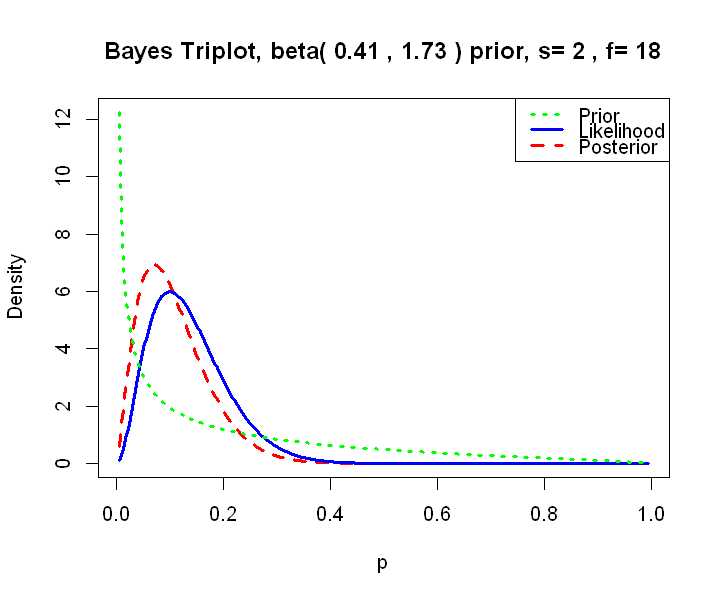

In [3]:
# Plot of the prior, likelihood and posterior for each observation
options(repr.plot.width = 6, repr.plot.height = 5)
# 1) 2 TEXTING, 18 NOT_TEXTING
beta.par + c(2, 18)
triplot(beta.par, c(2, 18))

[1]  6.41 35.73

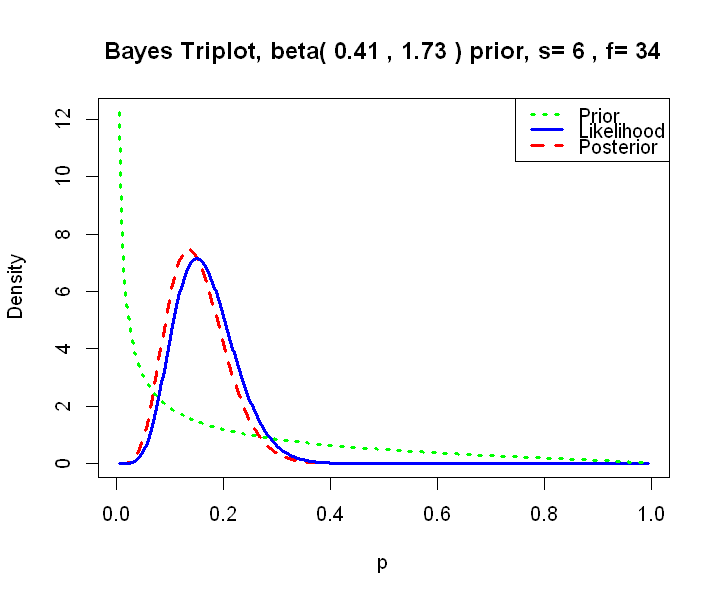

In [4]:
# 2) 4 TEXTING, 16 NOT_TEXTING - add success and failures from previous data
beta.par + c(6, 34)
triplot(beta.par, c(6, 34))

[1]  7.41 54.73

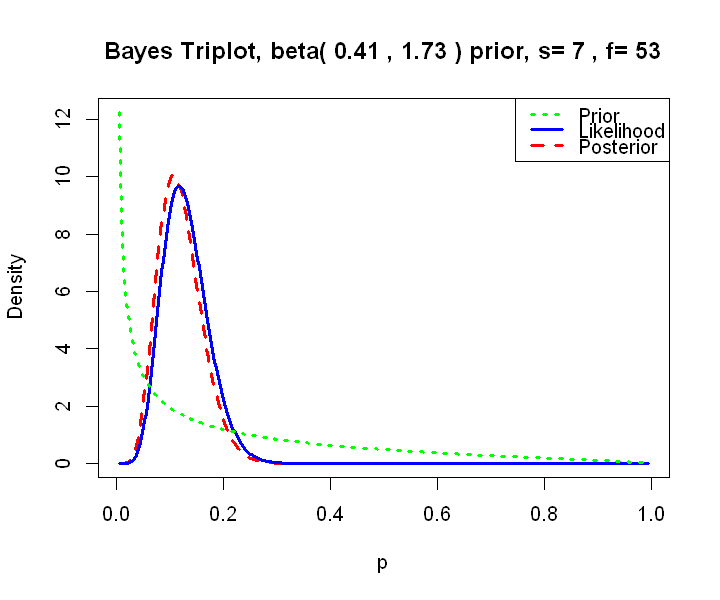

In [5]:
# 3) 1 TEXTING, 19 NOT_TEXTING - add success and failures from previous data
beta.par + c(7, 53)
triplot(beta.par, c(7, 53))

Simulate the final posterior distribution and do the following:
        > Plot the posterior with the 90% HDI shown
        > Report the upper and lower limits of the 90% HDI
        > Of the next hundred drivers what are the number of texting drivers in the 90% HDI?
        > Are the drivers in this area better or worse that the national figures indicate?

Plot the posterior with the 90% HDI shown
Report the upper and lower limits of the 90% HDI

5%        95% 
0.05896973 0.19226881

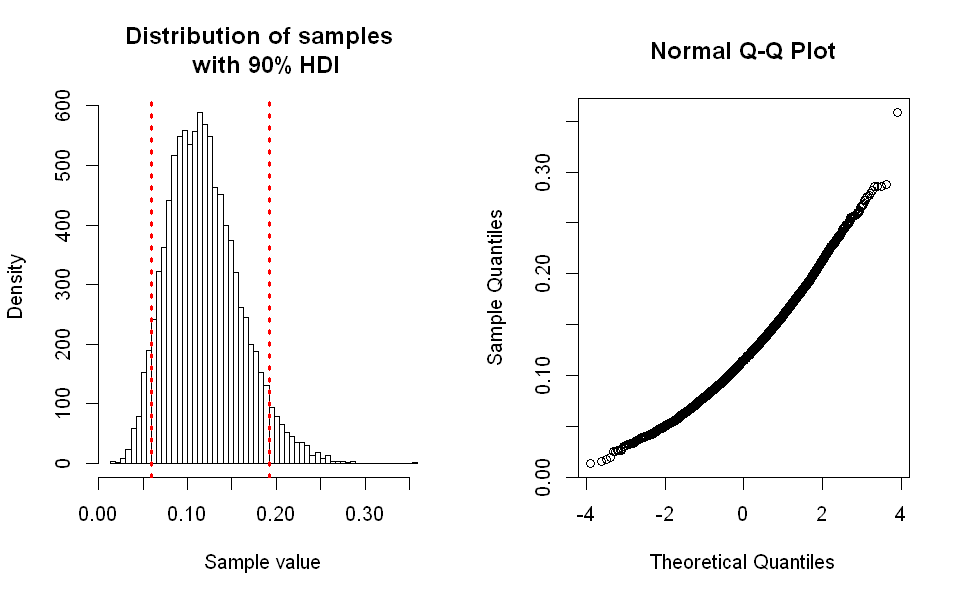

In [6]:
#Simulate the final posterior distribution and do the following:
# > Plot the posterior with the 90% HDI shown
# > Report the upper and lower limits of the 90% HDI
options(repr.plot.width=8, repr.plot.height=5)
beta.post.par = beta.par + c(7, 53)
post.sample = rbeta(10000, beta.post.par[1], beta.post.par[2])
par(mfrow = c(1,2))
quants = quantile(post.sample, c(0.05, 0.95))
breaks = seq(min(post.sample), max(post.sample), length.out = 61)
hist(post.sample, breaks = breaks, 
     main = 'Distribution of samples \n with 90% HDI',
     xlab = 'Sample value',
     ylab = 'Density')
abline(v = quants[1], lty = 3, col = 'red', lwd = 3)
abline(v = quants[2], lty = 3, col = 'red', lwd = 3)
qqnorm(post.sample)
par(mfrow = c(1,1))
quants

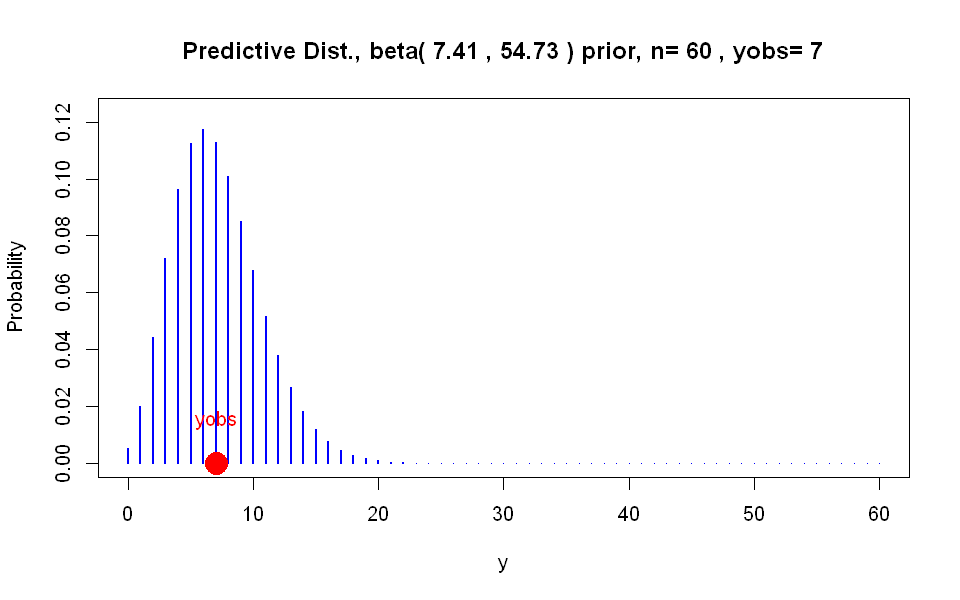

In [7]:
## check on the model
predplot(beta.post.par, 60, 7)

Of the next hundred drivers what are the number of texting drivers in the 90% HDI?

$prob
[1] 0.9098956

$set
 [1]  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

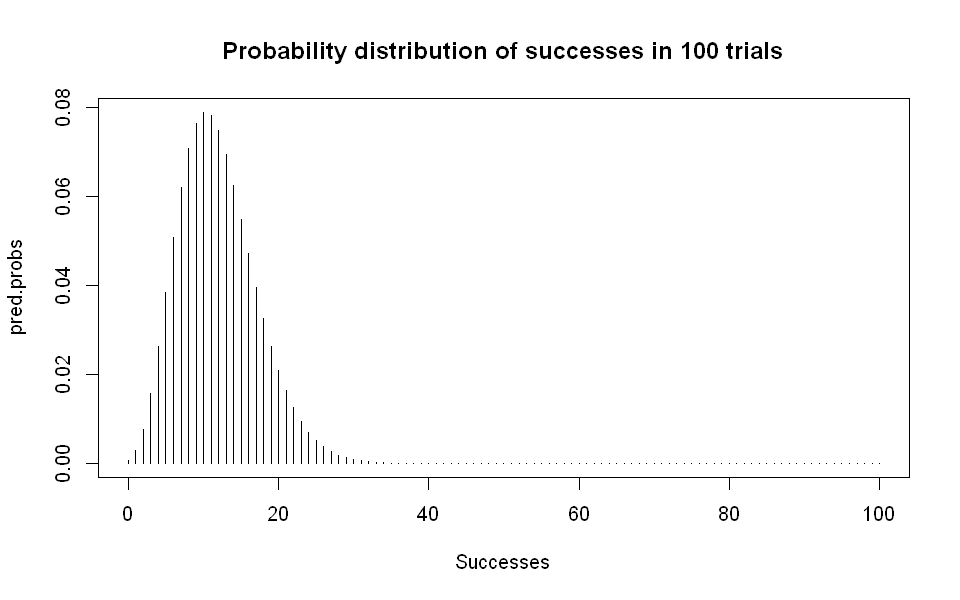

In [8]:
## Of the next hundred drivers what are the number of texting drivers in the 90% HDI?
n = 100
s = 0:n
pred.probs = pbetap(beta.post.par, n, s)
plot(s, pred.probs, type="h", 
     main = paste('Probability distribution of successes in', as.character(n), 'trials'),
     xlab = 'Successes')
discint(cbind(s, pred.probs), 0.90)

There are 17 texting drivers in the 90% HDI

[1] 0.41 1.73

[1] 17.41 84.73

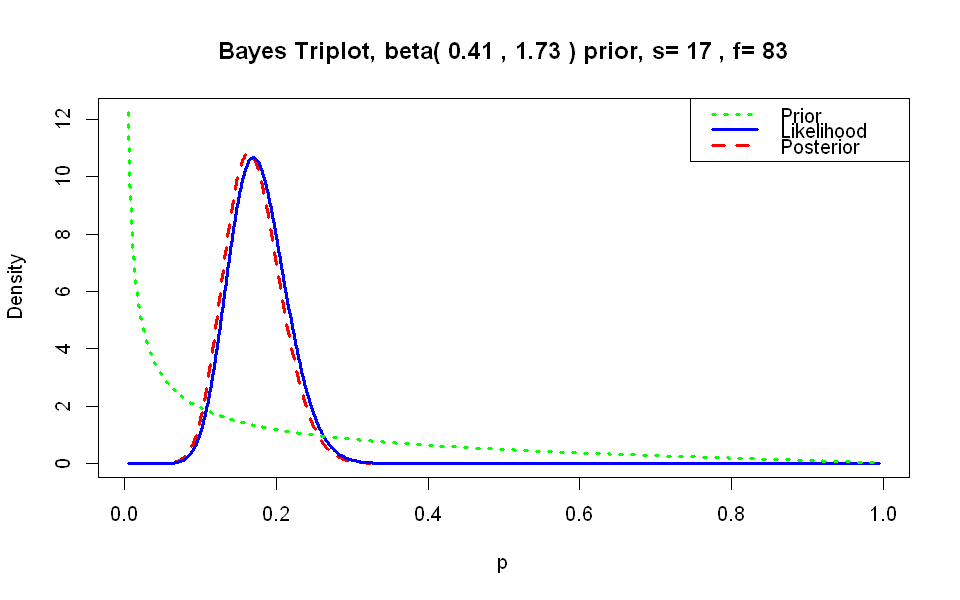

In [9]:
#Are the drivers in this area better or worse than the national figures indicate?

#17% of drivers TEXTING
#National Average
nat.ave.q1 = list(p=.5,x=.1)
nat.ave.q2 = list(p=.75,x=.3)
nat.ave.beta.par = beta.select(nat.ave.q1,nat.ave.q2)
nat.ave.beta.par

#apply national average prior 
nat.ave.beta.par + c(17, 83)
triplot(nat.ave.beta.par, c(17, 83))

These drivers appear to be in par with the national average